In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# dados originais
insurances = pd.read_csv('insurance_migue2.csv')
insurances

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [3]:
# um pouco mais de informações sobre os dados
insurances.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [4]:
# coeficiente de relação (quanto mais próximo de 1.0 ou -1.0, melhor atributo)
insurances.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [5]:
# Campos relavantes para o treinamento
cols = ['age', 'sex', 'bmi', 'children', 'region']
# Campo para predição
cols_target = ['charges']

regression = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(
    insurances[cols], insurances[cols_target], test_size=0.2, random_state=4)

In [6]:
x_train_age = x_train['age']
x_train_age

127     52
578     52
385     19
1203    51
413     25
431     29
707     49
427     18
574     57
435     60
290     28
256     56
696     53
874     44
1117    25
698     56
161     18
1089    56
963     46
1118    33
332     61
342     60
878     41
1027    23
279     51
802     21
1112    48
292     25
1137    26
511     27
        ..
426     38
243     40
680     21
343     63
954     34
1054    27
1336    21
706     51
56      58
422     40
149     19
533     37
183     44
1024    47
1150    18
1318    35
1068    63
946     42
951     51
823     44
109     63
1082    38
393     49
818     47
456     55
360     48
709     36
439     26
174     24
1146    60
Name: age, Length: 1070, dtype: int64

In [7]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

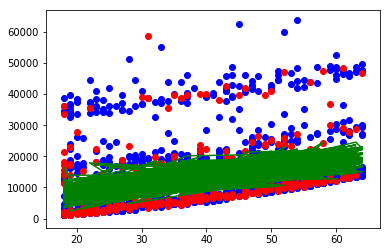

In [8]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)

plt.scatter(x_train['age'], y_train, color='blue')
plt.scatter(x_test['age'], y_test, color='red')
plt.plot(x_train['age'], model.predict(x_train), color='green')
plt.show()

In [9]:
x_train

,age,sex,bmi,children,region
127,52,0,37.400,0,0
578,52,1,30.200,1,0
385,19,1,34.400,0,0
1203,51,1,32.300,1,3
413,25,1,23.900,5,0
431,29,0,20.235,2,2
707,49,1,28.690,3,2
427,18,0,29.165,0,3
574,57,0,34.295,2,3
435,60,1,33.110,3,1


In [10]:
x_test

,age,sex,bmi,children,region
726,41,1,28.405,1,2
260,58,0,25.200,0,0
902,26,1,27.265,3,3
566,38,0,40.565,1,2
776,40,1,32.300,2,2
270,18,1,29.370,1,1
13,56,0,39.820,0,1
280,40,0,28.120,1,3
885,32,1,28.930,1,1
854,49,0,23.845,3,3


In [11]:
y_train

,charges
127,9634.538000
578,9724.530000
385,1261.859000
1203,9964.060000
413,5080.096000
431,4906.409650
707,10264.442100
427,7323.734819
574,13224.057050
435,13919.822900


In [12]:
y_test

,charges
726,6664.68595
260,11837.16000
902,4661.28635
566,6373.55735
776,6986.69700
270,1719.43630
13,11090.71780
280,22331.56680
885,19719.69470
854,24106.91255


In [13]:
# Executa Treinamento com 80% dos dados disponíveis
regression.fit(x_train, y_train)

# Faz previsão dos 20% dos dados que não entraram no treinamento
output = regression.predict(x_test)
output


array([[13794.48840641],
       [14277.55823003],
       [10952.14035158],
       [15886.30759572],
       [15433.17008588],
       [ 8592.13639524],
       [19224.33021922],
       [12022.3175824 ],
       [11720.80433372],
       [13536.13895233],
       [ 8366.4534779 ],
       [15479.89005393],
       [ 6986.33332498],
       [19100.08015537],
       [21088.27477975],
       [19930.48098453],
       [16301.76624865],
       [ 9659.30698177],
       [19624.50144597],
       [ 9550.67375809],
       [11375.96042422],
       [15827.16660619],
       [19471.77036393],
       [13096.67287857],
       [ 6257.12024184],
       [18210.6177075 ],
       [19433.52467573],
       [13278.02103497],
       [18911.35447808],
       [12526.30210372],
       [ 8500.48760063],
       [ 8578.01986062],
       [ 9271.22662484],
       [ 8341.93173707],
       [15051.95412936],
       [ 7569.34174472],
       [20205.66912438],
       [17523.72162842],
       [ 9472.24048642],
       [15697.18022642],


In [14]:
# Verifica a qualidade da previsão
score = r2_score(y_test, output)
score

0.1249349759055548

In [15]:
# Usa o treinamento para fazer uma previsão de um dado novo
df_new_house_info = pd.DataFrame(
    [(52, 0, 30.78, 1, 0, 3)], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

output2 = regression.predict(df_new_house_info)
output2

ValueError: shapes (1,6) and (5,1) not aligned: 6 (dim 1) != 5 (dim 0)